# 5.2) Feature Scaling - Standardization

In [2]:
import pandas as pd

- It is a technique to standardize the independent features present in the data in a fixed range.
- Why do we need Feature Scaling?
  - Suppose we have the following dataset (Refer to image below):
  - Let X be the no. of salary and Y be the no. of age and (x1,y1) & (x2,y2) are in row 2 and row 9 than:  
		(x2-x1)^2 = (83000-48000)^2 = 1225000000  
		and (y2-y1)^2 = (50-27)^2 = 529
  - If we use algorithms like KNN to predict willPurchase without scaling than due to domination of salary KNN will not perform well.

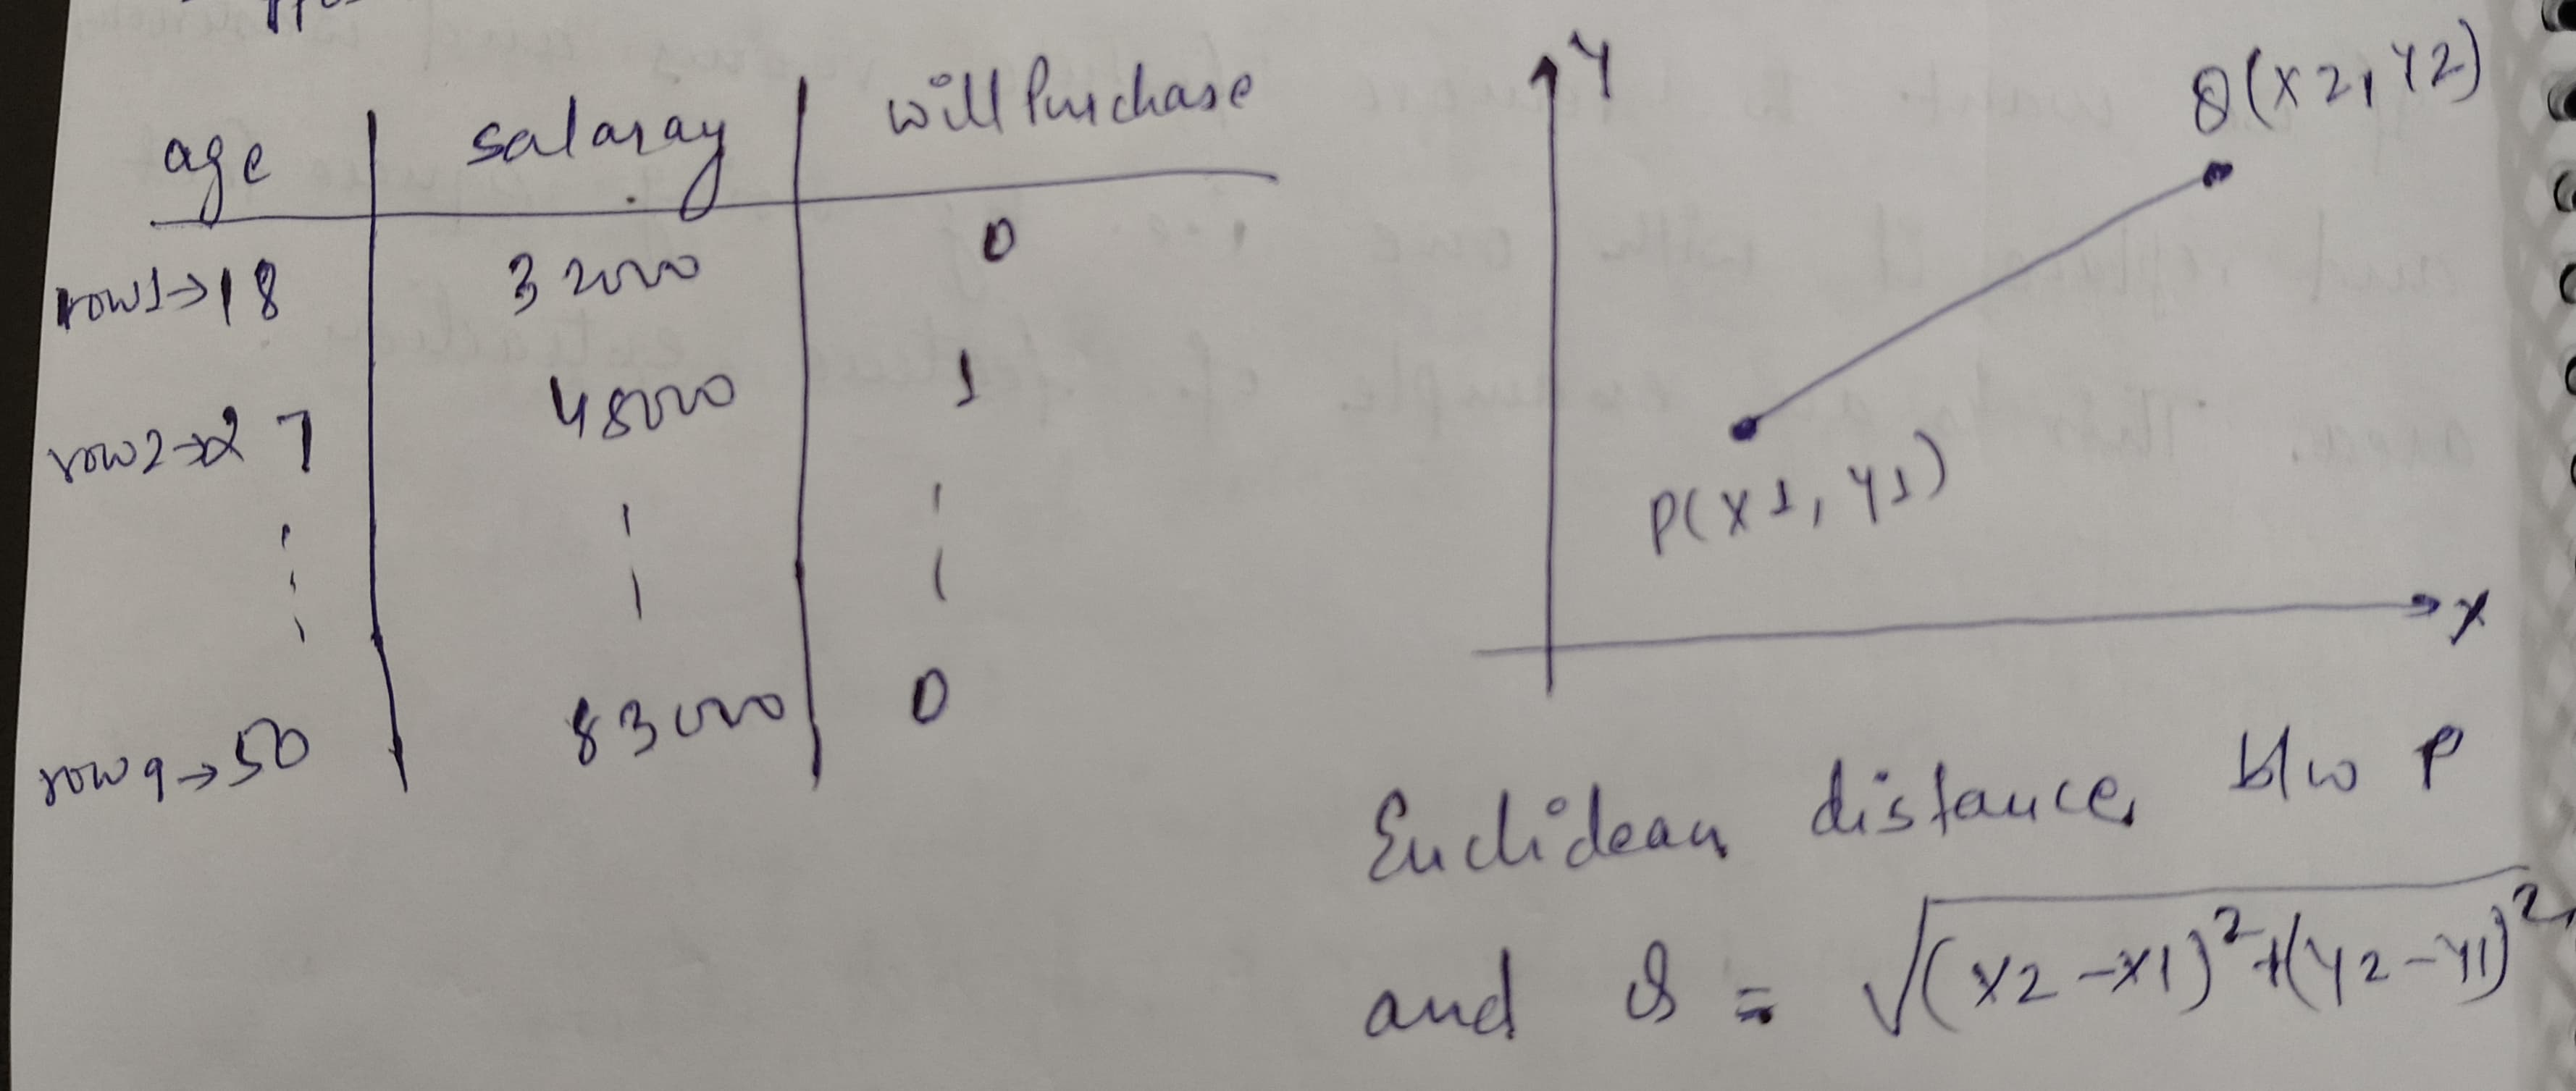

In [1]:
from IPython.display import Image, display
# Replace "path_to_image.png" with the path to your image
image_path = "Feature Engineering 4.jpeg"
display(Image(filename=image_path, width=500, height=400))

-  Types of Feature Scaling: (i) Standardization (Also called as Z-scale Normalization)  (ii) Normalization

### Standardization Intution:

In [5]:
# Suppose we have the following column in a dataset:
age = pd.Series([27, 15, 33, 63, 11, 29])
age

0    27
1    15
2    33
3    63
4    11
5    29
dtype: int64

We will transform the age column (say Xi) into a new column (scaled column, say Xi') as:  
	Xi' = (Xi - X̄)/ σ  
		where,  
        Xi' = New Column  
			   Xi = Old Column  
			   X̄ = mean  
			   σ = standard deviation

- **Note:** By using above formula we will generate scaled column (new column) and this new column will have mean (μ) = 0 and std. deviation (σ) = 1

### Geometric Intitution:

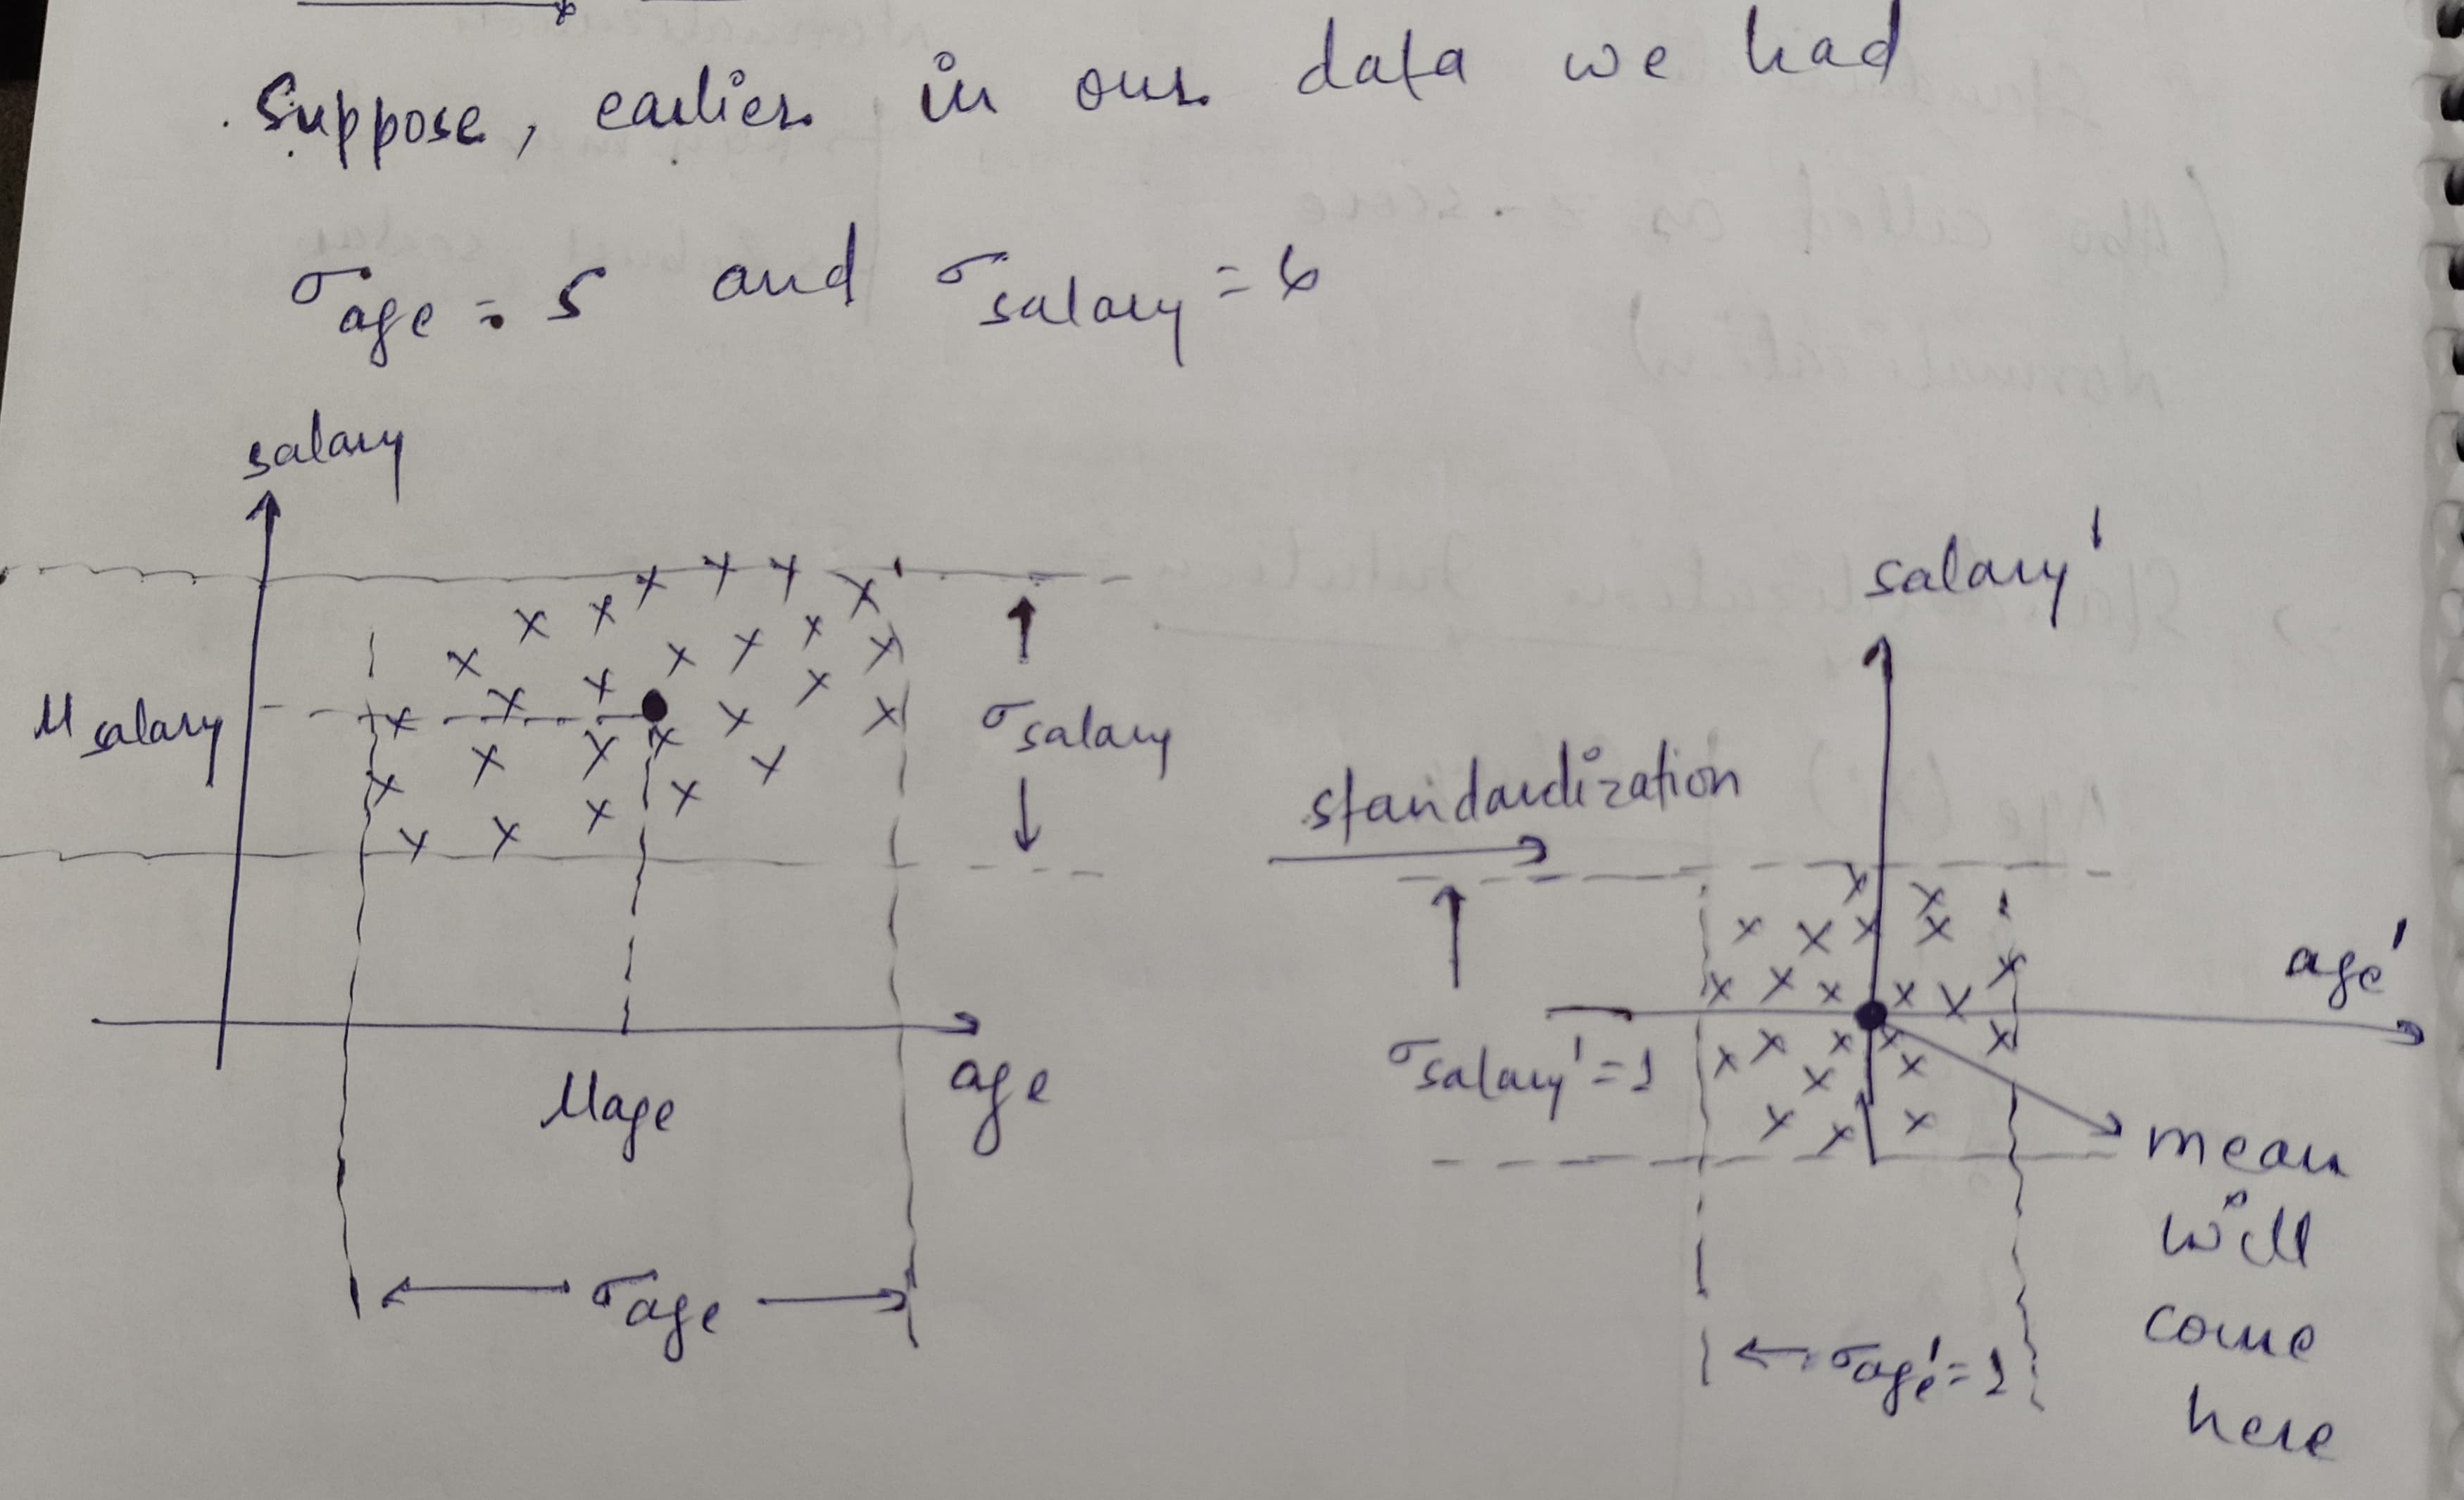

In [7]:
from IPython.display import Image, display
# Replace "path_to_image.png" with the path to your image
image_path = "Feature Engineering 5.jpeg"
display(Image(filename=image_path, width=500, height=400))

- mean got centered -> hence standardization is making mean centric
- std. deviation -> became one and hence our data's spread got squeezed/scaled.
  - If σ > 1 of original data -> after transformation spread will get squeezed.
  - If σ < 1 of original data -> after transformation spread will get scaled.
- Hence, std. deviation decides the scaling up/down of transformed data.

### Code

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
temp = pd.read_csv('Social_Network_Ads.csv')  # Social_Network_Ads.csv dataset can be found on Kaggle.
temp.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
293,15760570,Male,37,77000,0
41,15591915,Female,33,51000,0
142,15617134,Male,35,59000,0
28,15744529,Male,29,43000,0
330,15693264,Male,38,51000,0


In [18]:
# We will only take columns Age, EstimatedSalary and Purchased for our work:
df = temp.iloc[:,2:]
df.sample(5)

,Age,EstimatedSalary,Purchased
152,31,76000,0
157,29,75000,0
291,49,89000,1
363,42,79000,0
16,47,25000,1


**Note: Train Test Split**
- train_test_split function from Scikit-learn (sklearn) is used to split our dataset into training and testing sets. It is essential to evaluate how well our model performs on unseen data (i.e. test data).
- Basic Syntax:  
    from sklearn.model_selection import train_test_split  
    X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)  
    Here the parameters are:  
		X = Features (Eg.: Input Columns)  
		y = labels/target (i.e. output column)  
		test_size = percentage of data to use for training.  
		random_state = Used to control the randomness of train_test_split. Setting it a fixed number assures that we get the same split after each re-run of our code).

In [21]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased',axis=1), df['Purchased'], test_size = 0.3, random_state = 0)

- In above cell code:
  - df.drop('Purchased',axis=1): Removes the 'Purchased' column from feature matrix. It means drop the 'Purchased' column, and keep the rest so that we get only input features
  - df['Purchased']: Give me just 'Purchased' column from our dataset.

In [22]:
X_train.head()

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000


In [24]:
x_test.head()

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000


In [25]:
# Now using StandardScaler to perform scaling:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # getting StandardScaler object
scaler.fit(X_train)

StandardScaler()

- (Q) WHat is scaler.fit(X_train)?
  - When we call scaler.fit(X_train), we're training the scaler on our training data only. More specifically, it's doing this:
    - Calculating the mean and standard deviation of each feature (column) in our training set.
    - These values are stored inside the scaler (e.g., scaler.mean_, scaler.scale_) so they can be used later.
    - This is similar to how a machine learning model "learns" from the training data. But instead of learning patterns, the scaler is learning the scale (range, distribution) of the data.
- (Q) Why not fit on the test data?
  - We never fit on the test data so as to:
    - Avoid data leakage: If we fit the scaler on test data, we would be “peeking” into it. That means we’d be indirectly using test data in training, which makes our model evaluation unfair and unrealistic.

In [26]:
scaler.mean_   # getting the calculated mean and std

array([3.78642857e+01, 6.98071429e+04])

In [28]:
# transform train and test sets (internally uses the same formula that we discussed for Standardization):
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(x_test)

In [32]:
# X_train_scaled and X_test_scaled are numpy arrays so, converting them into DataFrame:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = x_test.columns)

In [33]:
X_train_scaled.head()

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047


In [34]:
X_test_scaled.head()

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804


In [35]:
# Comparing the different parameters like mean, std, etc. of train and train_scaled datasets:
print(np.round(X_train.describe(), 1))
np.round(X_train_scaled.describe(), 1)

         Age  EstimatedSalary
count  280.0            280.0
mean    37.9          69807.1
std     10.2          34641.2
min     18.0          15000.0
25%     30.0          43000.0
50%     37.0          70500.0
75%     46.0          88000.0
max     60.0         150000.0


,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


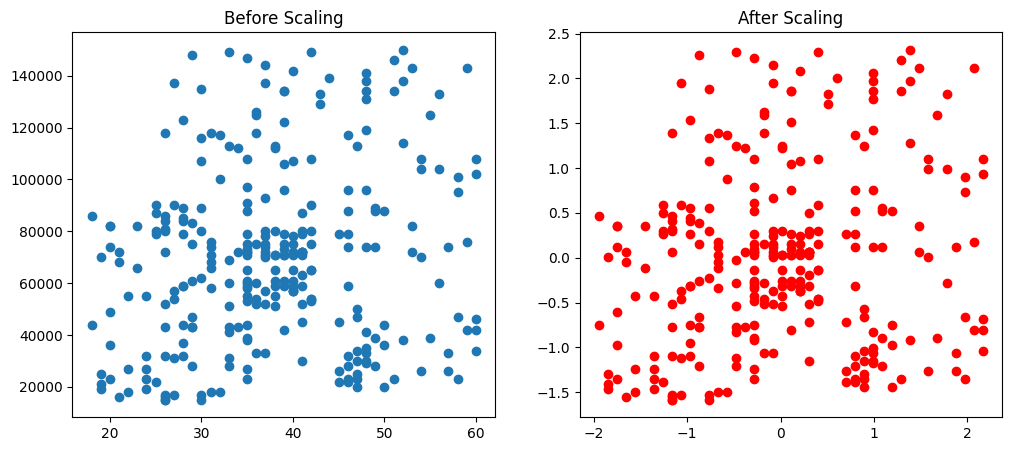

In [38]:
# Let us now analyze the effect of scaling using the following code:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax1.set_title("Before Scaling")
ax2.set_title("After Scaling")
plt.show()

- Observation from above graph: Only difference is in scaling thing rest we will have no difference (i.e. shape and everything will be as it is).

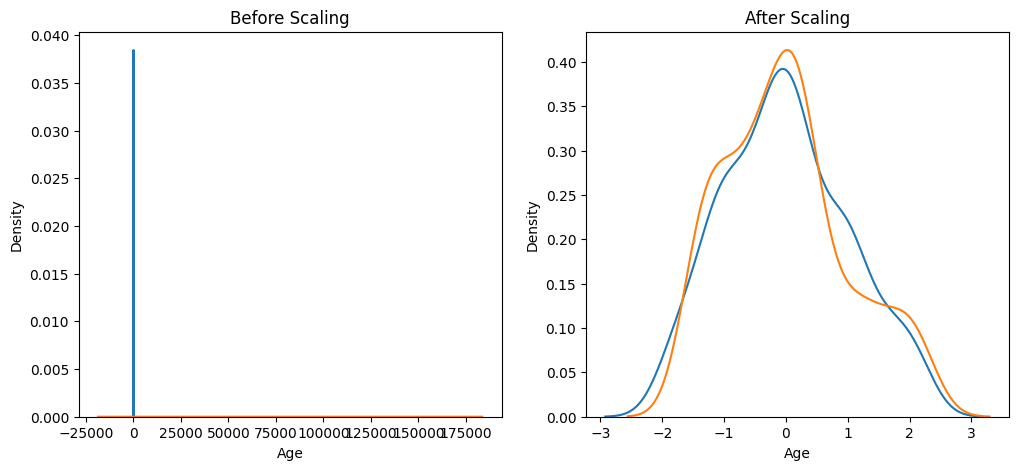

In [40]:
# Real use / Benefit of scaling can be seen with the following code:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'], ax = ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax = ax1)
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Age'], ax = ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax = ax2)
plt.show()

- Observation from above plot:
  - Before scaling: Age (Blue) looks like a thin spike, salary is wide and flat → because of the large value difference.
  - After scaling: Both are on the same scale, so we can clearly compare how their distributions look.

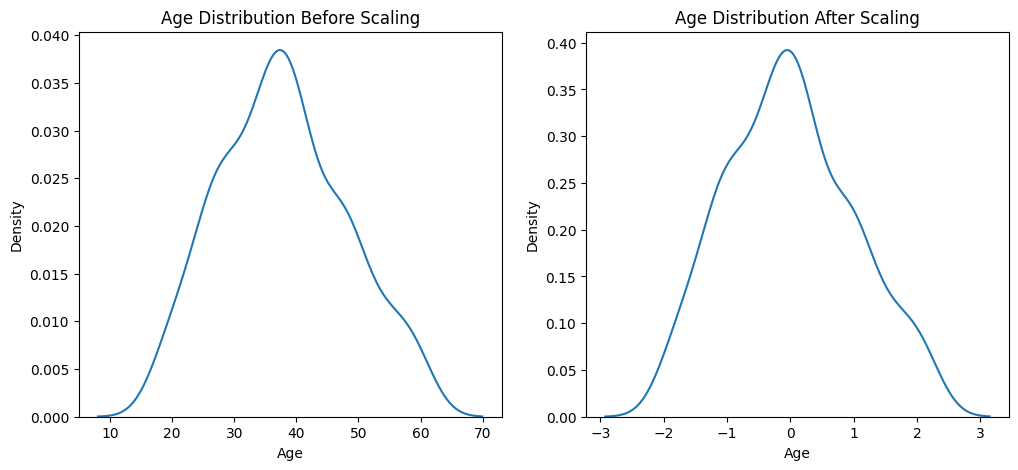

In [42]:
# Comparison of the distribution of a feature (say Age) before and after scaling can be done as:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title("Age Distribution Before Scaling")
sns.kdeplot(X_train['Age'], ax = ax1)
ax2.set_title("Age Distribution After Scaling")
sns.kdeplot(X_train_scaled['Age'], ax = ax2)
plt.show()

- Observation from the above plot: We will see that there is no effect on distribution before/after scaling. We can see this for any other columns as well (say for the EstimatedSalary column).

### (Q) Why scaling is important?

In [50]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scaled = LogisticRegression()
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)
from sklearn.metrics import accuracy_score
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [51]:
# Here, there is not much difference in accuracy but in general we will be having it.

**Note:** There is no loss of scaling. Depending on algorithm there is benefit of scaling. There are some algorithms (like DecisionTree) on which there is no affect of scaling (but we can still do scaling if we want as there is no loss).

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)
y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

# Observation: Since the algorithm is DecisionTree so no effect of scaling on the accuracy score.

Actual 0.875
Scaled 0.875


### Effect of Outliers:

- Let us say we introduce some outliers in our dataset "df".
- If we plot scatterplot now then we can see the outliers on the plot: plt.scatter(df['Age'], df['EstimatedSalary'])
- Now if we perform scaling as we performed earlier using StandardScaler by keeping some test data and forming the scaled DataFrames. And if we plot before scaling and after scaling for our dataset then we will see even after scaling the impact of the outlier is not reduced.
- Note: There may be a chance that we do not see all the outliers of the scaled train data's plot as some may go in testing data.

### When to use Standardization?
- In certain algorithms where we are dealing with distance and gradient things. Ex:
  - (a) K-Means - Here, we do feature scaling because we use the Euclidean distance measure.
  - (b) K-Nearest-Neighbrs - We do feature scaling because here we measure the distance between pairs of samples and these distances are influenced by the measurement units.
  - (c) Principle Component Analysis (PCA) - Because we try to get the feature with maximum variance.
  - (d) Gradient Descent - Theta calculation becomes faster after feature scaling and the learning rate in the updated equation of Stochastic Gradient Descet is same for every parameter.
  - (e) Artificial Neural Network - Here, we apply Gradient Descent and for Gradient Descent we do feature scaling.
- (Q) Where it is not required to do feature scaling?
  - There are certain algorithms where we do not need feature scaling (although there's no harm in doing feature scaling).
  - Ex: DecisionTree, RandomForest, GradientBoost, XGboost, etc.

=========================================================================================================